In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler

In [28]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [46]:
dataset=pd.read_csv("Obesity Classification.csv")

In [47]:
dataset

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [48]:
dataset.drop(['ID'],inplace=True,axis=1)

In [49]:
dataset

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...
103,11,Male,175,10,3.9,Underweight
104,16,Female,160,10,3.9,Underweight
105,21,Male,180,15,5.6,Underweight
106,26,Female,150,15,5.6,Underweight


In [50]:
dataset.describe()

,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000
mean,46.555556,166.574074,59.490741,20.549074
std,24.720620,27.873615,28.856233,7.583818
min,11.000000,120.000000,10.000000,3.900000
25%,27.000000,140.000000,35.000000,16.700000
50%,42.500000,175.000000,55.000000,21.200000
75%,59.250000,190.000000,85.000000,26.100000
max,112.000000,210.000000,120.000000,37.200000


In [51]:
def QuanQual(dataset):
    quan=[]
    qual=[]
    for ColumnName in dataset.columns:
        #print(ColumnName)
        if (dataset[ColumnName].dtypes=='O'):
            #print("qual")
            qual.append(ColumnName)
        else:
            #print("quan")
            quan.append(ColumnName)
    return quan,qual

In [52]:
quan,qual=QuanQual(dataset)

In [53]:
quan

['Age', 'Height', 'Weight', 'BMI']

In [54]:
qual

['Gender', 'Label']

In [55]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode",
                                "Q1:25%","Q2:50%","Q3:75%","Q4:99%","Q5:100%",
                                "IQR","1.5Rule","Lesser","Greater","Min","Max","Kurtosis","Skewness","Variance","Std_deviation"],columns=quan)

for ColumnName in quan:
    
    descriptive[ColumnName]["Mean"]=dataset[ColumnName].mean()
    descriptive[ColumnName]["Mean"]=dataset[ColumnName].mean()
    descriptive[ColumnName]["Median"]=dataset[ColumnName].median()
    descriptive[ColumnName]["Mode"]=dataset[ColumnName].mode()[0]
    descriptive[ColumnName]["Q1:25%"]=dataset.describe()[ColumnName]["25%"] 
    descriptive[ColumnName]["Q2:50%"]=dataset.describe()[ColumnName]["50%"]
    descriptive[ColumnName]["Q3:75%"]=dataset.describe()[ColumnName]["75%"]
    descriptive[ColumnName]["Q4:99%"]=np.percentile(dataset[ColumnName],99)
    descriptive[ColumnName]["Q5:100%"]=dataset.describe()[ColumnName]["max"]
    descriptive[ColumnName]["IQR"]= descriptive[ColumnName]["Q3:75%"]-descriptive[ColumnName]["Q1:25%"]
    descriptive[ColumnName]["1.5Rule"]=1.5*descriptive[ColumnName]["IQR"]
    descriptive[ColumnName]["Lesser"]=descriptive[ColumnName]["Q1:25%"]-descriptive[ColumnName]["1.5Rule"]
    descriptive[ColumnName]["Greater"]=descriptive[ColumnName]["Q3:75%"]+descriptive[ColumnName]["1.5Rule"]
    descriptive[ColumnName]["Min"]=dataset[ColumnName].min()
    descriptive[ColumnName]["Max"]=dataset[ColumnName].max()
    descriptive[ColumnName]["Kurtosis"]=dataset[ColumnName].kurtosis()
    descriptive[ColumnName]["Skewness"]=dataset[ColumnName].skew()
    descriptive[ColumnName]["Variance"]=dataset[ColumnName].var()
    descriptive[ColumnName]["Std_deviation"]=dataset[ColumnName].std()

In [56]:
descriptive

,Age,Height,Weight,BMI
Mean,46.555556,166.574074,59.490741,20.549074
Median,42.5,175.0,55.0,21.2
Mode,16,160,75,16.7
Q1:25%,27.0,140.0,35.0,16.7
Q2:50%,42.5,175.0,55.0,21.2
Q3:75%,59.25,190.0,85.0,26.1
Q4:99%,107.93,210.0,119.65,36.99
Q5:100%,112.0,210.0,120.0,37.2
IQR,32.25,50.0,50.0,9.4
1.5Rule,48.375,75.0,75.0,14.1


## Bivariate

In [58]:
dataset[quan].cov()

,Age,Height,Weight,BMI
Age,611.109034,-52.985462,331.780893,88.898650
Height,-52.985462,776.938387,344.967982,74.903340
Weight,331.780893,344.967982,832.682156,212.894384
BMI,88.898650,74.903340,212.894384,57.514298


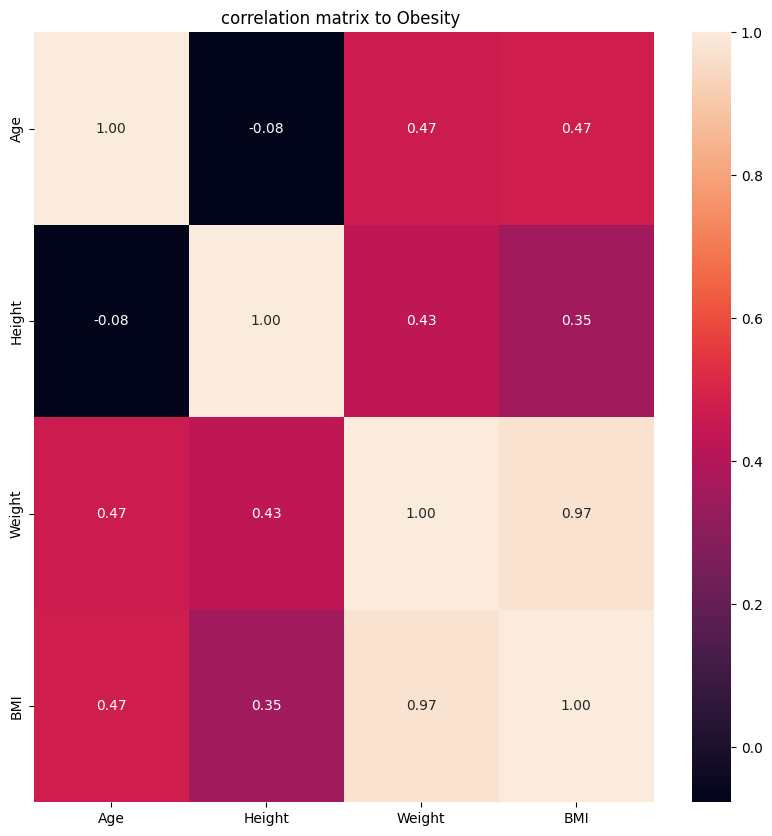

In [59]:
corrmatrix=dataset[quan].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmatrix,annot=True,fmt="0.2f",color="Red")
plt.title("correlation matrix to Obesity ")
plt.show()

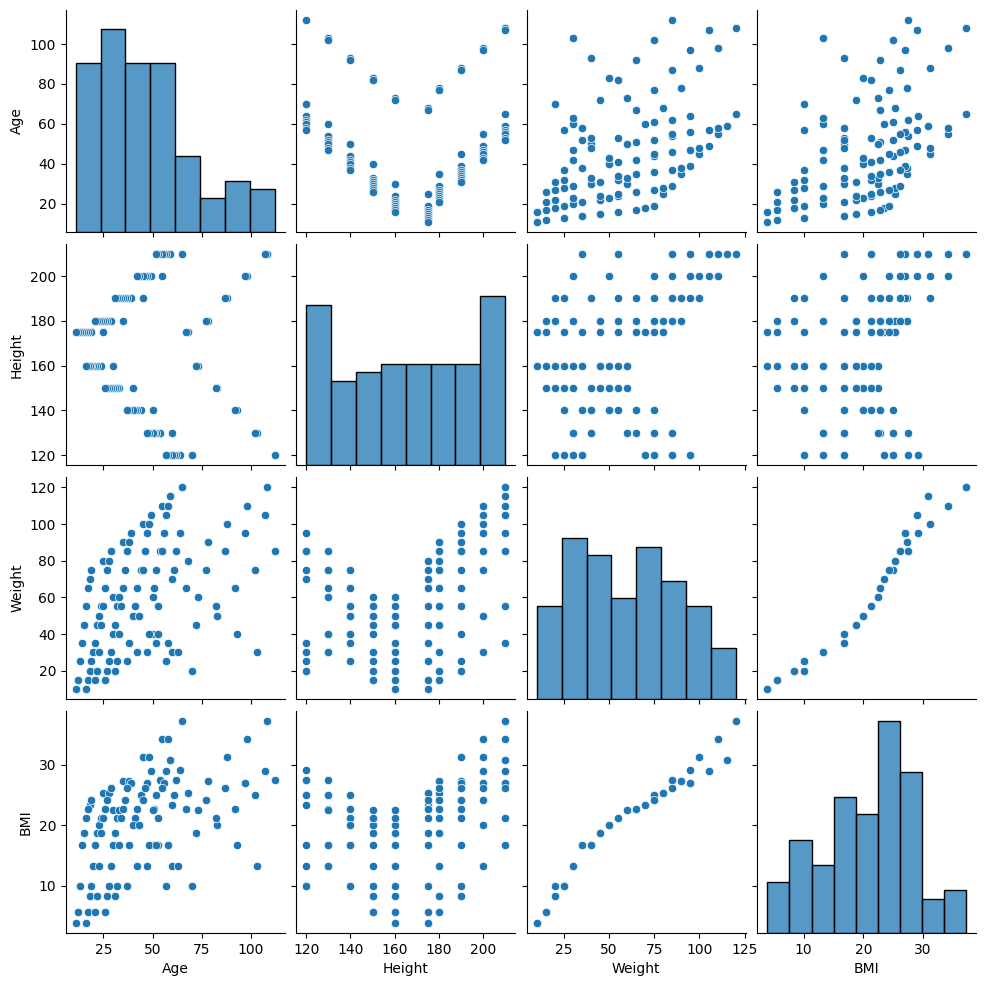

In [60]:
import seaborn as sns
sns.pairplot(dataset)

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
def cal_vif(X):
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return vif

In [63]:
quan

['Age', 'Height', 'Weight', 'BMI']

In [66]:
cal_vif(dataset[['Age', 'Height', 'Weight', ]])

,variables,VIF
0,Age,5.206454
1,Height,6.918619
2,Weight,8.357648


## How the males and females are significantly differ with BMI

In [96]:

from scipy.stats import ttest_ind
male=dataset[dataset['Gender']=='Male']['BMI']
female=dataset[dataset['Gender']=='Female']['BMI']
ttest_ind(male,female)


TtestResult(statistic=3.7513020296962, pvalue=0.00028723321268303705, df=106.0)

In [95]:
# H0 : There is no significant similarties between males and females with BMI
#Reject Null Hypothesis when p_value < 0.05. 
#Hence here we are rejecting Null Hypothesis and accepting the Alternate Hypothesis
#So There is a similarties between males and females with BMI

## Is weight and height significantly difference with the BMI

In [101]:

import scipy.stats as stats
stats.f_oneway(dataset['Weight'],dataset['BMI'],dataset['Height'])
# H0 : There is no significant similarties between males and females with BMI
#Reject Null Hypothesis when p_value < 0.05. 
#Hence here we are accepting Null Hypothesis and rejecting the Alternate Hypothesis
#So There is no ignificant difference between Weight,Height and BMI

F_onewayResult(statistic=1111.2215078396475, pvalue=5.294497896658014e-145)

## Is Age significantly difference with the BMI

In [103]:

import scipy.stats as stats
stats.f_oneway(dataset['Age'],dataset['BMI'])
# H0 : There is no significant similarties between males and females with BMI
#Reject Null Hypothesis when p_value < 0.05. 
#Hence here we are accepting Null Hypothesis and rejecting the Alternate Hypothesis
#So There is no ignificant difference between Weight,Height and BMI

F_onewayResult(statistic=109.24597002533545, pvalue=6.341116968380449e-21)

## Histogram

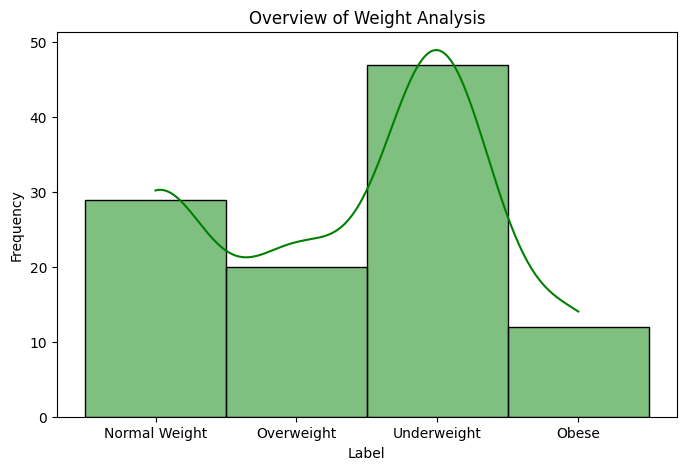

In [70]:
plt.figure(figsize=(8, 5))
sns.histplot(dataset["Label"], bins=20, kde=True, color="green")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.title("Overview of Weight Analysis")
plt.show()

## Scatterplot

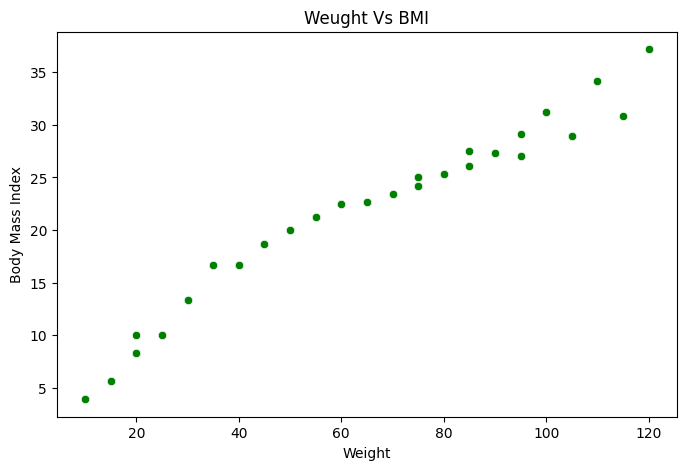

In [78]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=dataset["Weight"], y=dataset["BMI"], color="green")
plt.xlabel("Weight")
plt.ylabel("Body Mass Index")
plt.title("Weught Vs BMI")
plt.show()

## Project Analysis

## How many people are in obese category?

In [91]:
Obese_category = dataset[dataset['Label'] == 'Obese']

In [93]:
len(Obese_category)

12

In [ ]:
#There are 12 people are in obese categories

## How many males are Overweight?

In [80]:
Overweight_males=dataset[(dataset['Gender']=='Male') & (dataset['Label']=='Overweight')]

In [81]:
Overweight_males

,Age,Gender,Height,Weight,BMI,Label
2,35,Male,180,90,27.3,Overweight
14,38,Male,190,90,27.3,Overweight
22,78,Male,180,90,27.3,Overweight
31,29,Male,180,85,26.1,Overweight
32,39,Male,190,95,27.0,Overweight
42,37,Male,190,85,26.1,Overweight
44,47,Male,200,95,27.0,Overweight
52,87,Male,190,85,26.1,Overweight
54,97,Male,200,95,27.0,Overweight
64,46,Male,200,85,26.1,Overweight


In [82]:
nos_overweight_males=len(Overweight_males)

In [83]:
nos_overweight_males

12

## How many females are normal weight?

In [86]:
normalweight_female=dataset[(dataset['Gender']=='Female') & (dataset['Label']=='Normal Weight')]

In [87]:
normalweight_female

,Age,Gender,Height,Weight,BMI,Label
1,30,Female,160,60,22.5,Normal Weight
13,33,Female,150,60,22.5,Normal Weight
21,73,Female,160,60,22.5,Normal Weight
30,24,Female,160,55,21.2,Normal Weight
41,32,Female,150,55,21.2,Normal Weight
43,42,Female,140,65,22.7,Normal Weight
51,82,Female,150,55,21.2,Normal Weight
53,92,Female,140,65,22.7,Normal Weight
63,41,Female,140,55,21.2,Normal Weight
65,51,Female,130,65,22.7,Normal Weight


In [88]:
nos_normalweight_female=len(normalweight_female)

In [89]:
nos_normalweight_female

12

## How many people are in Overweight Label when their age is less than 40

In [104]:
lessthan_forty=dataset[(dataset['Age'] >=40) & (dataset['Label']=='Overweight')]

In [107]:
lessthan_forty

,Age,Gender,Height,Weight,BMI,Label
22,78,Male,180,90,27.3,Overweight
33,44,Female,140,75,25.0,Overweight
35,54,Female,130,85,27.5,Overweight
37,64,Female,120,95,29.1,Overweight
44,47,Male,200,95,27.0,Overweight
45,52,Female,130,75,25.0,Overweight
47,62,Female,120,85,27.5,Overweight
52,87,Male,190,85,26.1,Overweight
54,97,Male,200,95,27.0,Overweight
55,102,Female,130,75,25.0,Overweight


In [106]:
no_lessthan_forty=len(lessthan_forty)

In [108]:
no_lessthan_forty

15